In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
Rain_train = pd.read_csv('Data/train.csv')
Rain_train.head(3)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1


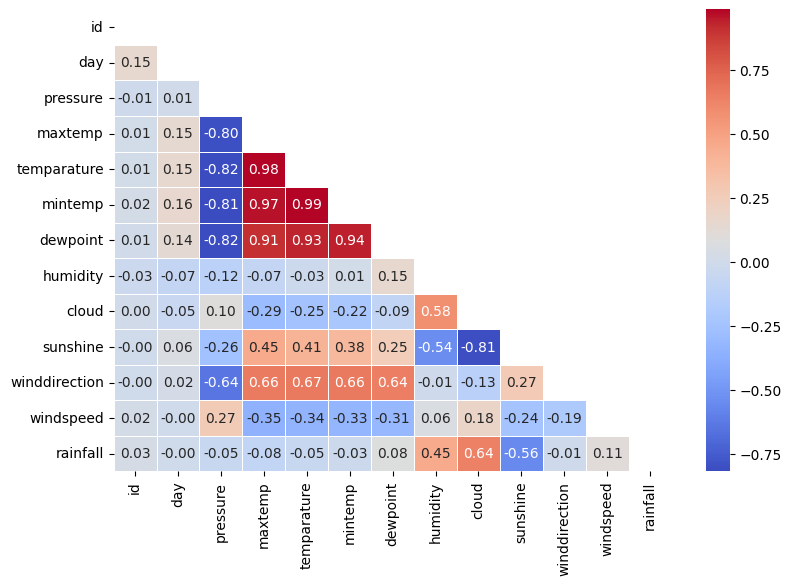

In [3]:
corr = Rain_train.corr(numeric_only=True)
cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(Rain_train.corr(numeric_only=True), annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm', mask=np.triu(Rain_train.corr(numeric_only=True)))
#plt.savefig('fig/Original_corr.png')
plt.show()

In [4]:
Rain_train['maxt-dew'] = Rain_train['maxtemp']- Rain_train['dewpoint']

In [5]:
Rain_train['temp_gap'] = Rain_train['maxtemp'] - Rain_train['mintemp']

In [6]:
Rain_train['cloud_humidity'] = Rain_train['cloud']*Rain_train['humidity'] 

In [7]:
Rain_train['cloud_humidity/Press']= Rain_train['cloud_humidity']/ Rain_train['pressure']

In [8]:
Rain_train['wind_power'] = (Rain_train['windspeed'] **0.5) * Rain_train['winddirection']
# 0.49 Rain_train['wind_power'] = (Rain_train['windspeed'] **0.5) * Rain_train['cloud']

In [9]:
Rain_train['wi'] = (0.4*Rain_train['humidity'])+ (0.3*Rain_train['cloud'])-(0.3*Rain_train['sunshine'])

In [10]:
Rain_train['sun_humidity'] = Rain_train['sunshine']/Rain_train['humidity']

In [11]:
# Rain_train['lluvia'] = Rain_train['rainfall']

In [12]:
Rain_train_Feature = Rain_train.drop(['day','pressure','temparature','mintemp',
                                      'winddirection','rainfall'], axis=1)

In [13]:
Rain_train_Feature['rainfall']= Rain_train['rainfall']

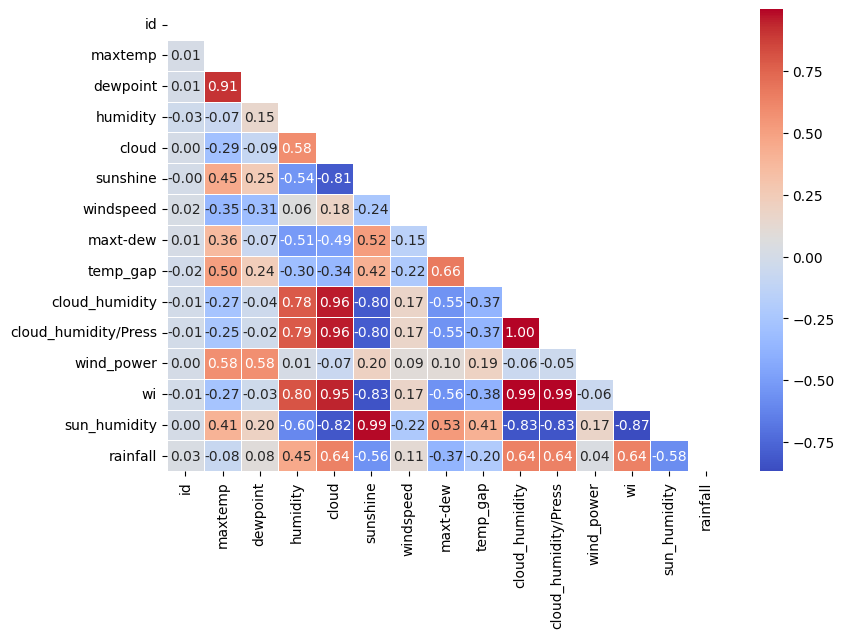

In [14]:
corr = Rain_train_Feature.corr(numeric_only=True)
cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(Rain_train_Feature.corr(numeric_only=True), annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm', mask=np.triu(Rain_train_Feature.corr(numeric_only=True)))
#plt.savefig('fig/Original_corr.png')
plt.show()

In [15]:
Rain_train_Feature.to_csv('Data/Submission.1.Rain.csv', index=False)

In [16]:
# Rain_train_Feature_S = Rain_train_Feature.StandardScaler()